In [64]:
import json
import pandas as pd
from collections import Counter
import seaborn as sns

In [45]:
with open("data/final_data.json", "r") as fp:
    final_data = json.load(fp)

In [46]:
list(final_data.keys())

['articles', 'users', 'collections']

In [7]:
final_data["articles"][0]

{'id': '120ea540b567',
 'versionId': 'd80a7ec122cf',
 'creatorId': '9729fe8eb452',
 'homeCollectionId': '336d898217ee',
 'title': 'Learning Python: From Zero to Hero',
 'detectedLanguage': 'en',
 'latestVersion': 'd80a7ec122cf',
 'latestPublishedVersion': 'd80a7ec122cf',
 'hasUnpublishedEdits': False,
 'latestRev': 1640,
 'createdAt': 1506267244649,
 'updatedAt': 1562550816678,
 'acceptedAt': 0,
 'firstPublishedAt': 1506804497730,
 'latestPublishedAt': 1562550816367,
 'vote': True,
 'experimentalCss': '',
 'displayAuthor': '',
 'virtuals': {'statusForCollection': 'APPROVED',
  'allowNotes': True,
  'previewImage': {'imageId': '1*ueWmI48uuShON-hX7LwI0w.png',
   'filter': '',
   'backgroundSize': '',
   'originalWidth': 1217,
   'originalHeight': 689,
   'strategy': 'resample',
   'height': 0,
   'width': 0},
  'wordCount': 2734,
  'imageCount': 2,
  'readingTime': 10.700314465408805,
  'subtitle': 'First of all, what is Python? According to its creator, Guido van Rossum, Python is a:',


In [47]:
keys_parent = [
    "creatorId", "homeCollectionId", "title", "detectedLanguage", "latestVersion", "latestPublishedVersion",
    "hasUnpublishedEdits", "latestRev", "createdAt", "updatedAt", "acceptedAt", "firstPublishedAt",
    "latestPublishedAt", "uniqueSlug", "isEligibleForRevenue"
]

keys_virtuals = [
    "imageCount", "readingTime", "subtitle", "recommends", "isBookmarked",
    "socialRecommendsCount", "responsesCreatedCount", "totalClapCount", "sectionCount"
]

keys_others = [
    "linkCount", "userId", "name", "username", "collectionName", "followerCount"
]

def is_keys_unique(*key_lists):
    all_keys = []
    for key_list in key_lists:
        if not isinstance(key_list, list):
            return (False, [])
        all_keys += key_list
        
    freq = Counter(all_keys)
    common_keys = [k for k,v in dict(freq).items() if v > 1]
        
    return (len(common_keys) == 0, common_keys)

def get_required_fields(artical, User, Collection):
    fields = {}
    for key in keys_parent:
        fields[key] = artical[key]
        
    virtuals = artical["virtuals"]
    for key in keys_virtuals:
        fields[key] = virtuals[key]
        
    fields["linkCount"] = len(virtuals["links"]["entries"])
    #fields["userId"] = virtuals["userPostRelation"]["userId"]
    
    fields["name"] = User[fields["creatorId"]]["name"]
    fields["username"] = User[fields["creatorId"]]["username"]
    
    if fields["homeCollectionId"]:
        fields["collectionName"] = Collection[fields["homeCollectionId"]]["name"]
        fields["followerCount"] = Collection[fields["homeCollectionId"]]["metadata"]["followerCount"]
    else:
        fields["collectionName"] = None
        fields["followerCount"] = None
        
    return fields

In [48]:
res, li = is_keys_unique(keys_parent, keys_virtuals, keys_others)
if res:
    filtered_data = []
    for i, article in enumerate(final_data["articles"]):
        try:
            filtered = get_required_fields(article, final_data["users"], final_data["collections"])
            filtered_data.append(filtered)
        except:
            print("err at index: ", i)
            traceback.print_exc(file=sys.stdout)
            #print(article)
            #break
else:
    print("keys are not unique: ", li)

In [50]:
df = pd.DataFrame(filtered_data)

In [51]:
df.describe()

,latestRev,createdAt,updatedAt,acceptedAt,firstPublishedAt,latestPublishedAt,imageCount,readingTime,recommends,socialRecommendsCount,responsesCreatedCount,totalClapCount,sectionCount,linkCount,followerCount
count,998.000000,9.980000e+02,9.980000e+02,998.0,9.980000e+02,9.980000e+02,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,850.000000
mean,1207.540080,1.531297e+12,1.551619e+12,0.0,1.532178e+12,1.544834e+12,7.617234,6.535180,389.326653,0.635271,10.607214,1814.280561,2.905812,11.944890,236703.242353
std,1187.334375,2.763021e+10,1.740345e+10,0.0,2.749739e+10,2.530600e+10,8.557188,4.201887,687.211633,0.902042,14.685401,3488.357820,3.635215,14.309236,186438.496891
min,1.000000,1.430332e+12,1.521783e+12,0.0,1.430360e+12,1.439315e+12,0.000000,0.124528,82.000000,0.000000,0.000000,96.000000,1.000000,0.000000,23.000000
25%,464.250000,1.513156e+12,1.532743e+12,0.0,1.514559e+12,1.528707e+12,2.000000,3.836557,131.000000,0.000000,3.000000,555.500000,1.000000,4.000000,25104.500000
50%,884.000000,1.534208e+12,1.552650e+12,0.0,1.534871e+12,1.549192e+12,5.000000,5.662736,199.500000,0.000000,6.000000,906.500000,2.000000,8.000000,323321.000000
75%,1531.250000,1.550763e+12,1.568342e+12,0.0,1.552041e+12,1.565792e+12,10.000000,8.176258,383.250000,1.000000,12.000000,1709.250000,3.000000,15.000000,323321.000000
max,14216.000000,1.577903e+12,1.578210e+12,0.0,1.577921e+12,1.578209e+12,68.000000,56.063208,12614.000000,3.000000,149.000000,63906.000000,51.000000,164.000000,605447.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 29 columns):
creatorId                 998 non-null object
homeCollectionId          998 non-null object
title                     998 non-null object
detectedLanguage          998 non-null object
latestVersion             998 non-null object
latestPublishedVersion    998 non-null object
hasUnpublishedEdits       998 non-null bool
latestRev                 998 non-null int64
createdAt                 998 non-null int64
updatedAt                 998 non-null int64
acceptedAt                998 non-null int64
firstPublishedAt          998 non-null int64
latestPublishedAt         998 non-null int64
uniqueSlug                998 non-null object
isEligibleForRevenue      998 non-null bool
imageCount                998 non-null int64
readingTime               998 non-null float64
subtitle                  998 non-null object
recommends                998 non-null int64
isBookmarked              998 no

In [53]:
df.head()

,creatorId,homeCollectionId,title,detectedLanguage,latestVersion,latestPublishedVersion,hasUnpublishedEdits,latestRev,createdAt,updatedAt,...,isBookmarked,socialRecommendsCount,responsesCreatedCount,totalClapCount,sectionCount,linkCount,name,username,collectionName,followerCount
0,9729fe8eb452,336d898217ee,Learning Python: From Zero to Hero,en,d80a7ec122cf,d80a7ec122cf,False,1640,1506267244649,1562550816678,...,False,3,149,63906,3,9,TK,leandrotk_,freeCodeCamp.org,605447.0
1,539e9e1c30df,7f60cf5620c9,What exactly can you do with Python? Here are ...,en,397fea98dcba,397fea98dcba,False,1015,1528464694459,1574191254530,...,False,3,125,42173,1,13,YK Sugi,ykdojo,Towards Data Science,323321.0
2,e7803b4cff21,7f60cf5620c9,How to build your own Neural Network from scra...,en,a4a88e661d98,a4a88e661d98,False,1534,1526217376316,1553825591028,...,False,3,147,39112,2,1,James Loy,jamesloyys,Towards Data Science,323321.0
3,536515a4b25d,336d898217ee,An A-Z of useful Python tricks,en,aad6f867ef65,aad6f867ef65,False,3685,1499530087373,1537533652761,...,False,3,59,27003,1,32,Peter Gleeson,petergleeson1,freeCodeCamp.org,605447.0
4,e2f299e30cb9,7f60cf5620c9,The Next Level of Data Visualization in Python,en,b840bc2b3c93,b840bc2b3c93,False,1601,1546783056809,1555353461686,...,False,2,55,13357,5,30,Will Koehrsen,williamkoehrsen,Towards Data Science,323321.0


In [55]:
len(df["collectionName"].unique())

138

In [68]:
df["totalArticles"] = 1

In [59]:
df.sort_values(by="followerCount", ascending=False)

,creatorId,homeCollectionId,title,detectedLanguage,latestVersion,latestPublishedVersion,hasUnpublishedEdits,latestRev,createdAt,updatedAt,...,isBookmarked,socialRecommendsCount,responsesCreatedCount,totalClapCount,sectionCount,linkCount,name,username,collectionName,followerCount
0,9729fe8eb452,336d898217ee,Learning Python: From Zero to Hero,en,d80a7ec122cf,d80a7ec122cf,False,1640,1506267244649,1562550816678,...,False,3,149,63906,3,9,TK,leandrotk_,freeCodeCamp.org,605447.0
294,a052c58d32ab,336d898217ee,Send Emails Using Python,en,f83d4114e09c,f83d4114e09c,False,847,1475856132037,1542420574470,...,False,2,18,1281,2,9,Arjun Krishna Babu,arjunkrishnababu96,freeCodeCamp.org,605447.0
497,4594fcc157e1,336d898217ee,How to make your own sentiment analyzer using ...,en,e0ee3a21d176,e0ee3a21d176,False,284,1548992003065,1550056054778,...,False,0,7,683,2,15,Dzaky Widya Putra,dzakyputra,freeCodeCamp.org,605447.0
277,cb9d97d4b61a,336d898217ee,Data science with Python: 8 ways to do linear ...,en,d88a6b932272,d88a6b932272,False,1027,1512697172477,1556165195828,...,False,0,5,1598,5,27,Tirthajyoti Sarkar,tirthajyoti,freeCodeCamp.org,605447.0
283,f85b306cec29,336d898217ee,How I used Python to analyze Game of Thrones,en,dea879ed7ff6,dea879ed7ff6,False,1840,1554651541903,1555093072370,...,False,0,9,5669,2,31,Rocky Kev,kev.rocky,freeCodeCamp.org,605447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,63fb3da6e61e,,"Hoje sou um professor feliz, Python no ensino ...",pt,29e337ee71c8,29e337ee71c8,False,505,1499889551502,1538834336121,...,False,0,5,365,1,15,Fernando Masanori,fmasanori,None,NaN
976,d8b99ba6ec83,,Artificial Intelligence Programming Python,en,e97eb3cb4202,e97eb3cb4202,False,149,1537002722723,1537043624354,...,False,0,2,381,1,2,Rinu Gour,rinu.gour123,None,NaN
980,d56a4a50fc50,,Tutorial: Write a Finite State Machine to pars...,en,8c09634ef983,8c09634ef983,False,990,1508894018263,1528567509989,...,False,0,5,488,2,5,Brian Ray,brianray_7981,None,NaN
994,6e322c075d30,,Dependency Injection: Python,en,77bb09de4880,77bb09de4880,False,1059,1531818932083,1576537770494,...,False,0,0,412,1,6,Shivam Aggarwal,shivama205,None,NaN


In [71]:
df.groupby("collectionName").mean().sort_values(by="followerCount", ascending=False).head(10)

,hasUnpublishedEdits,latestRev,createdAt,updatedAt,acceptedAt,firstPublishedAt,latestPublishedAt,isEligibleForRevenue,imageCount,readingTime,recommends,isBookmarked,socialRecommendsCount,responsesCreatedCount,totalClapCount,sectionCount,linkCount,followerCount,totalArticles
collectionName,,,,,,,,,,,,,,,,,,,
freeCodeCamp.org,0.000000,1316.363636,1.523446e+12,1.546570e+12,0.0,1.526928e+12,1.539023e+12,0.054545,5.781818,6.479463,704.945455,0.0,0.727273,13.109091,3595.272727,1.381818,11.727273,605447.0,1.0
The Startup,0.000000,1279.142857,1.555349e+12,1.564882e+12,0.0,1.556605e+12,1.561684e+12,0.428571,4.857143,5.480818,205.142857,0.0,0.285714,10.428571,947.142857,3.714286,5.428571,552913.0,1.0
HackerNoon.com,0.035714,1027.946429,1.511580e+12,1.547497e+12,0.0,1.512447e+12,1.542073e+12,0.053571,5.089286,6.386798,459.785714,0.0,1.821429,13.678571,2165.946429,2.160714,17.125000,477032.0,1.0
Towards Data Science,0.032746,1384.541562,1.541036e+12,1.554248e+12,0.0,1.541778e+12,1.550168e+12,0.340050,9.254408,7.229877,446.793451,0.0,0.604534,10.607053,1959.030227,2.720403,11.405542,323321.0,1.0
Be Yourself,0.000000,168.000000,1.461664e+12,1.528970e+12,0.0,1.461676e+12,1.493568e+12,0.000000,2.000000,2.228616,778.000000,0.0,2.000000,27.000000,1274.000000,2.000000,1.000000,157948.0,1.0
Prototypr,0.000000,809.000000,1.509824e+12,1.529416e+12,0.0,1.510162e+12,1.527539e+12,0.000000,4.000000,4.088679,115.000000,0.0,0.000000,1.000000,617.000000,2.000000,10.000000,154659.0,1.0
codeburst,0.000000,809.928571,1.513912e+12,1.536233e+12,0.0,1.515129e+12,1.526254e+12,0.071429,9.071429,5.782592,356.714286,0.0,0.857143,10.571429,1752.357143,2.928571,13.214286,89618.0,1.0
Netflix TechBlog,0.000000,250.000000,1.556323e+12,1.556660e+12,0.0,1.556554e+12,1.556660e+12,0.000000,1.000000,7.094340,1635.000000,0.0,2.000000,12.000000,7597.000000,1.000000,38.000000,88370.0,1.0
Better Programming,0.043478,785.782609,1.560732e+12,1.570629e+12,0.0,1.560969e+12,1.569031e+12,0.695652,2.586957,4.005325,310.847826,0.0,1.260870,5.956522,1174.717391,5.804348,8.391304,84528.0,1.0


In [67]:
df.groupby("collectionName").mean().sort_values(by="totalClapCount", ascending=False)

,hasUnpublishedEdits,latestRev,createdAt,updatedAt,acceptedAt,firstPublishedAt,latestPublishedAt,isEligibleForRevenue,imageCount,readingTime,recommends,isBookmarked,socialRecommendsCount,responsesCreatedCount,totalClapCount,sectionCount,linkCount,followerCount
collectionName,,,,,,,,,,,,,,,,,,
Applied Data Science,0.0,3611.000000,1.519614e+12,1.576230e+12,0.0,1.520479e+12,1.576230e+12,0.000000,17.000000,11.333962,1520.500000,0.0,2.0,36.500000,9613.500000,6.500000,11.500000,5664.0
Netflix TechBlog,0.0,250.000000,1.556323e+12,1.556660e+12,0.0,1.556554e+12,1.556660e+12,0.000000,1.000000,7.094340,1635.000000,0.0,2.0,12.000000,7597.000000,1.000000,38.000000,88370.0
Machine Learning in Practice,0.0,1416.666667,1.509069e+12,1.561672e+12,0.0,1.509257e+12,1.546657e+12,0.333333,10.000000,5.243711,2028.333333,0.0,2.0,27.333333,7212.666667,2.333333,116.000000,7955.0
JamesLearningNote,0.0,694.000000,1.506289e+12,1.549084e+12,0.0,1.506599e+12,1.537594e+12,0.000000,5.000000,4.865333,323.000000,0.0,0.0,1.000000,6869.500000,2.000000,5.500000,820.0
"Technology, Invention, App, and More",0.0,1243.000000,1.437451e+12,1.552818e+12,0.0,1.437544e+12,1.507696e+12,0.000000,8.500000,4.257704,1283.000000,0.0,1.5,56.000000,6807.000000,1.000000,3.500000,5670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
This is not a Monad tutorial,0.0,342.000000,1.492136e+12,1.527698e+12,0.0,1.492180e+12,1.492192e+12,0.000000,1.000000,12.033962,111.000000,0.0,0.0,1.000000,322.000000,1.000000,5.000000,1628.0
Broken Window,0.0,3616.333333,1.483088e+12,1.526832e+12,0.0,1.483155e+12,1.483722e+12,0.000000,4.666667,5.355031,138.333333,0.0,0.0,3.666667,313.333333,2.000000,1.666667,1816.0
Music Thing Modular Notes,0.0,1328.000000,1.479658e+12,1.528061e+12,0.0,1.481307e+12,1.482140e+12,0.000000,4.000000,6.405660,116.000000,0.0,0.0,8.000000,307.000000,1.000000,2.000000,319.0


In [70]:
df.groupby("collectionName").sum().sort_values(by="totalArticles", ascending=False)

,hasUnpublishedEdits,latestRev,createdAt,updatedAt,acceptedAt,firstPublishedAt,latestPublishedAt,isEligibleForRevenue,imageCount,readingTime,recommends,isBookmarked,socialRecommendsCount,responsesCreatedCount,totalClapCount,sectionCount,linkCount,followerCount,totalArticles
collectionName,,,,,,,,,,,,,,,,,,,
Towards Data Science,13.0,549663,611791428770943,617036626973961,0,612085950377299,615416832391505,135.0,3674,2870.261006,177377,0.0,240,4211,777735,1080,4528,128358437.0,397
HackerNoon.com,2.0,57565,84648454828230,86659846824269,0,84697013423600,86356093007422,3.0,285,357.660692,25748,0.0,102,766,121293,121,959,26713792.0,56
freeCodeCamp.org,0.0,72400,83789551939874,85061368131964,0,83981020446437,84646271905740,3.0,318,356.370440,38772,0.0,40,721,197740,76,645,33299585.0,55
Better Programming,2.0,36146,71793666826129,72248939351206,0,71804593509913,72175428747409,32.0,119,184.244969,14299,0.0,58,274,54037,267,386,3888288.0,46
Mybridge for Professionals,0.0,13657,50039877360146,50630866626180,0,50045912932443,50298789885693,0.0,728,118.795283,9303,0.0,27,73,46279,428,738,837507.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G Adventures Technology,0.0,198,1535417447631,1535544265943,0,1535480888178,1535480888178,0.0,1,5.683019,245,0.0,0,6,1111,2,9,174.0,1
Flant,0.0,1031,1565331308654,1570258798702,0,1565352048254,1570258798474,0.0,1,5.898113,107,0.0,0,2,860,1,15,475.0,1
Faun,0.0,1029,1534105212393,1574351723427,0,1534118064759,1574351723130,0.0,10,7.974528,162,0.0,2,2,559,4,21,10069.0,1


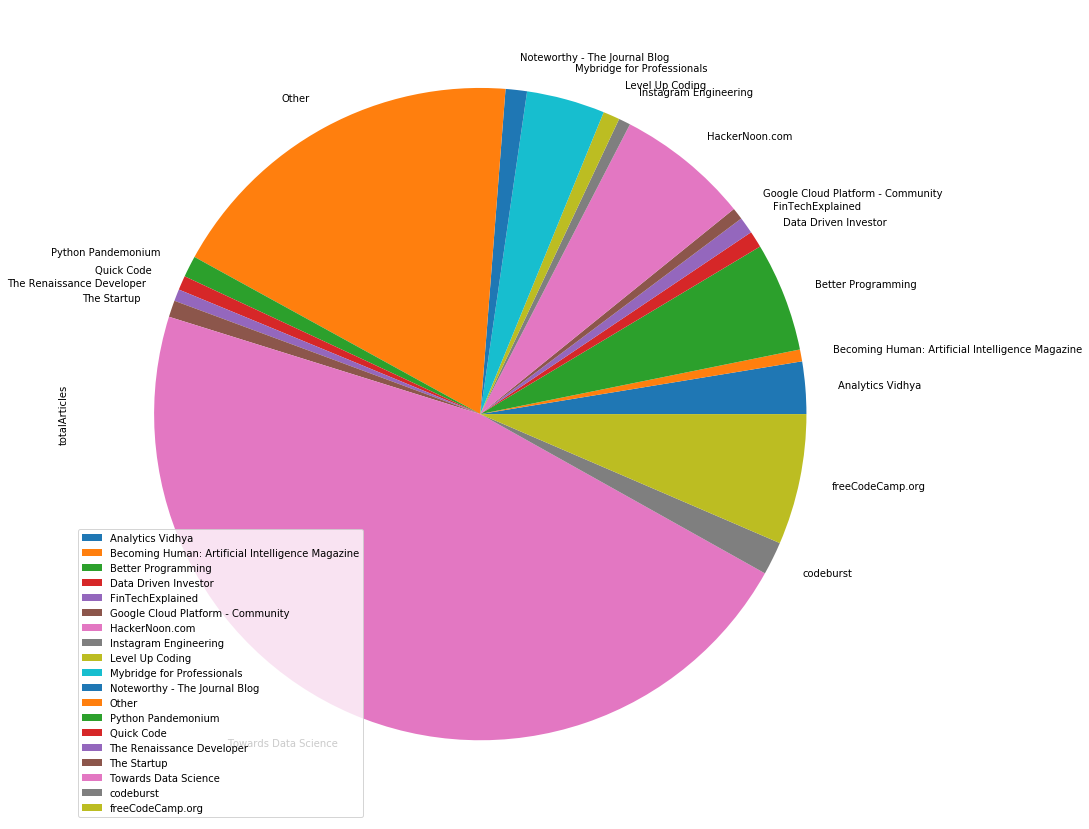

In [80]:
df_pie = df.groupby("collectionName").sum().sort_values(by="totalArticles", ascending=False)
df_pie["other"] = df_pie.index
df_pie.loc[df_pie["totalArticles"] < 5, "other"] = "Other"
df_pie.groupby("other").sum().plot.pie(y="totalArticles", figsize=(15,15))

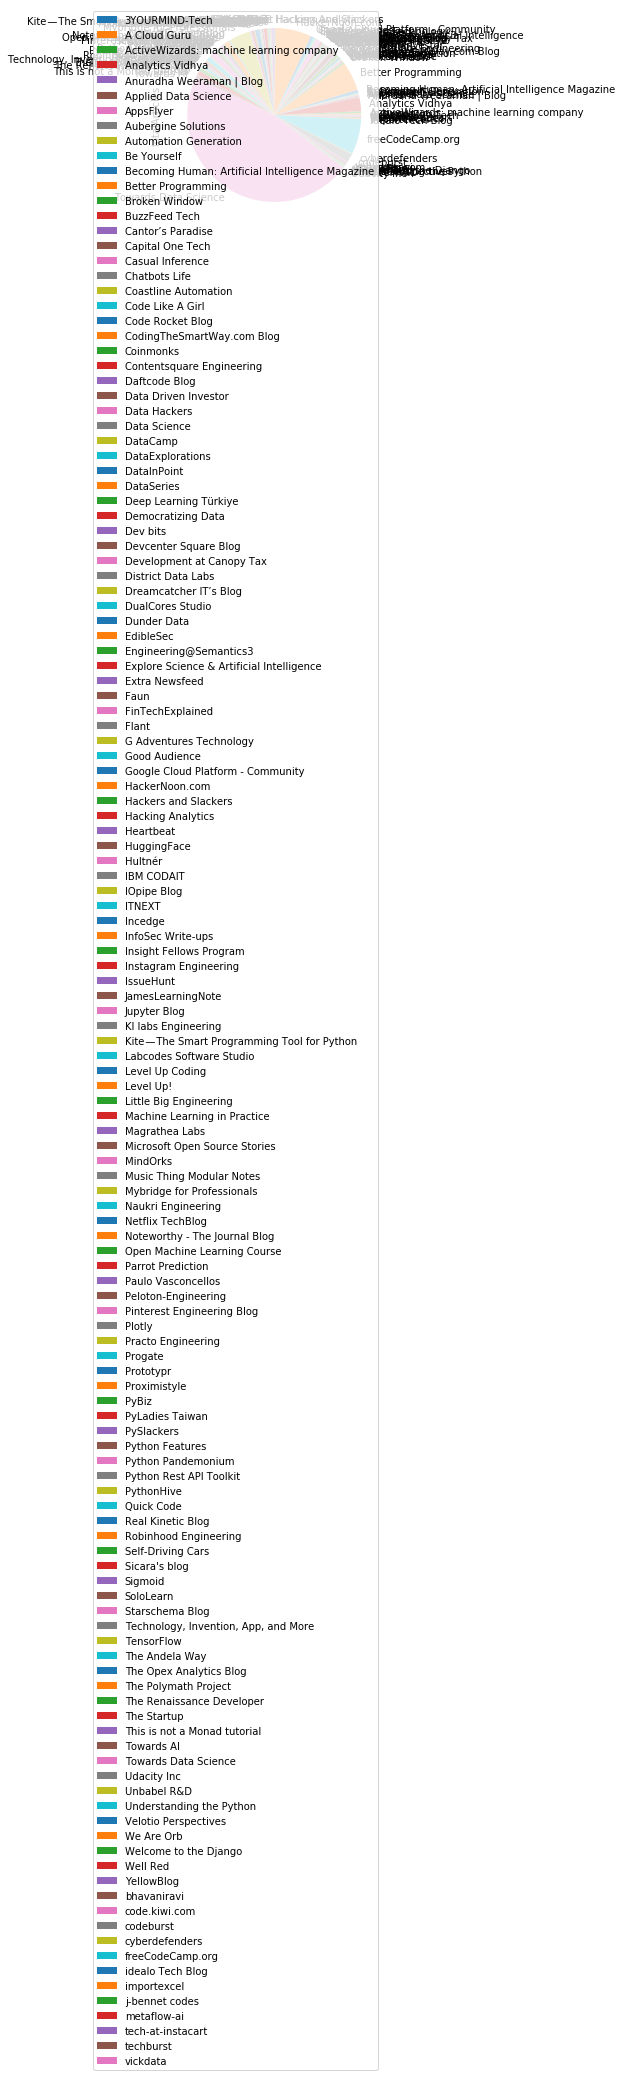

In [72]:
df.groupby("collectionName").sum().plot.pie(y="totalArticles")

In [65]:
pair_list = ["totalClapCount", "responsesCreatedCount", "socialRecommendsCount", "linkCount", "followerCount"]
df_pair_grid = df.loc[:, pair_list]

/home/yahya/.local/share/virtualenvs/analyze-medium-articles-N0y1pFha/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/yahya/.local/share/virtualenvs/analyze-medium-articles-N0y1pFha/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


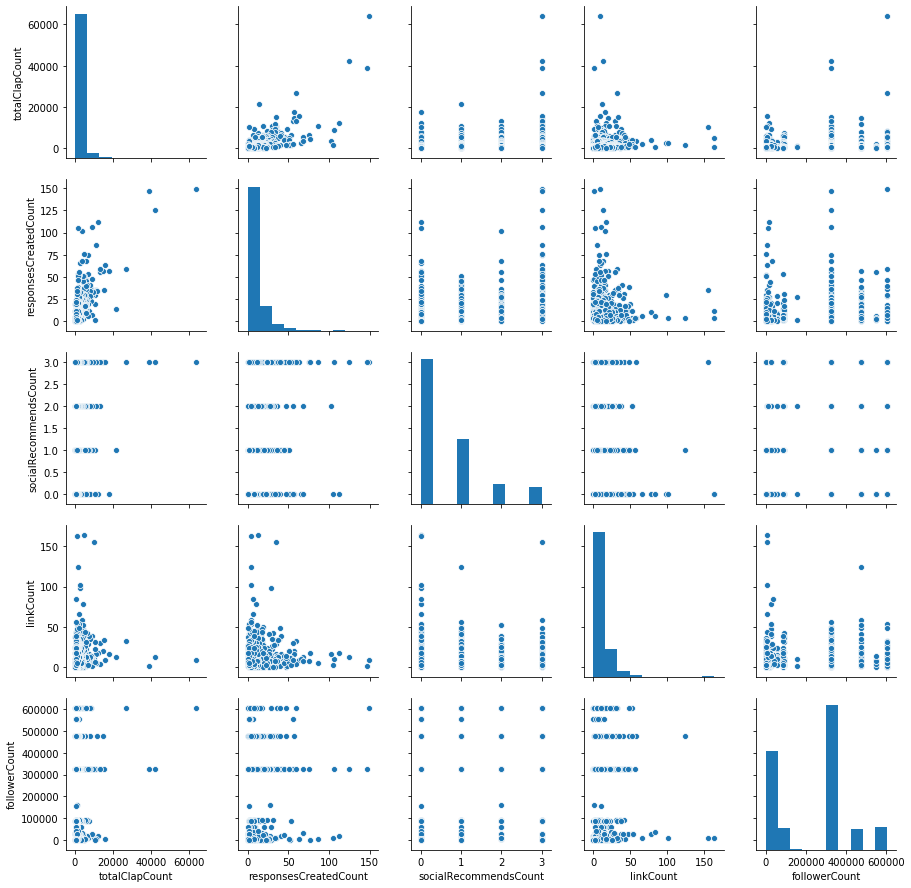

In [66]:
sns.pairplot(df_pair_grid)

In [20]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield len(lst[i:i + n])

def generate_loop_index_list(start, stop, step=1):
  return list(chunks(range(start, stop), step))

In [22]:
generate_loop_index_list(0,7,10)

[7]

In [35]:
maxnum = 7
result_size = 10 if maxnum >= 10 else maxnum
json.dumps({"page": 1, "pageSize": result_size})

'{"page": 1, "pageSize": 7}'